# Fundamentals

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from PIL import Image

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

As already outlined, there exist three heat trasnfer modes. All of them are important for the modelling of fires.

:::{figure-md} fig-heat-transfer-overview

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/Heat-transmittance-means2.jpg" width="40%">

Schematic illustration of the various heat transfer modes. Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Heat-transmittance-means2.jpg).
:::


* **conduction**: gas phase near the flame, heating of solids (critical structures or solid fuel sources)
* **convection**: transport of hot smoke in buildings, heat flux from hot gas to building structures
* **radiation**: heating of walls and fuel sources due to hot gases and soot

## Heat Conduction

The heat conduction in solids is different for (electric) insulators and (electric) conductors.
While the are no free electrons in an insulator the conduction is mainly due to phonons, i.e. atom oscillations in the ordered lattice.

In addition to this transport mechanism, the free electrons in conductors allow to significantly increase the heat conducting capacity. Therefore, (electric) conductors are better heat conductors than (electric) insulators.

:::{figure-md} fig-heat-conduction-solid

<img src="./figs/solid-oszillations.svg" width="80%">

Illustrative representation of heat conduction in a solid. Particle ensembles with high temperature (red) have higher oszilation amplitutes as those at medium (yellow) or low (blue) temperature.
:::


In gases and fluids, particles are not in fixed positions. They collide with each other and thus transfer energy and momentum. If the mean free length is small (w.r.t. the system size) then the collisions tend to establish an equilibrium.

A general global picture is as follows:
* Hot parts of a gas contain particles with high (thermal) kinetic energy,
* cold parts have slower particles, 
* due to collisions, both distributions tend to equalise and therefore there is an heat flow from the warm to the cold portions of the gas.



:::{figure-md} fig-heat-conduction-fluid

<img src="./figs/gas-collisions.svg" width="80%">

Illustrative representation of heat conduction in a fluid. Particle from warm regions have more (thermal) kinetic energy and transfer it to particles with lower one.
:::


In general, all heat conduction processes may be modelled with the (differential) Fourier's law

$$
\mf \vec{q} = -\mathbf{k} \nabla T \quad ,
$$

where $\mf \vec{q}$ is the conduction vector, $\mf \mathbf{k}$ is the conduction matrix and $\mf T$ the temperature field. In general the conduction is neither isotropic nor homogenous, therefore a scalar heat conduction coefficient is not sufficient. Additionally, it depends on the temperature.

The integral form describes the heat transfer rate through an surface $\mf S$ (given a constant scalar $\mf k$)

$$
\mf \partial_t Q = -k \int_S \nabla T \ dS
$$


The mathematical description of heat conduction is given by the heat equation for the temperature $\mf T=T(\vec{x}, t)$. In solids, there is no convection, thus this is the only equation needed to determine the temperature. 

$$
\mf \partial_t T - \alpha\nabla^2T = 0
$$

In absence of work done, the change of the heat content $\Delta Q$ is directly proportional to the change in temperature $\Delta T$:

$$
\mf \Delta Q = c_p \rho \Delta T\quad .
$$

Therefore conduction coefficient in the above parabolic PDE is given by

$$
\mf \alpha = \frac{k}{c_p \rho } \quad .
$$

**Thermally thin** materials have a short balancing time (e.g. due to high conductivity) and react directly to changing boundary conditions. The temperature profiles are in general linear.

**Thermally thick** materials propagate the changes in boundary conditions on a longer time scale as the boundary values may change. Therefore the temperature profile is in general of non-linear nature.

:::{figure-md} fig-heat-conduction-1D

<img src="./figs/1D-heat-conduction.svg" width="60%">

Schematics of the temperature profile in a one dimensional setup. The heat flux is based on the temperature difference between the heated side ($\mf T_0$) and the backward side ($\mf T_B$). Thermally thin and thick materials have a different temporal scales.
:::



## Convective Heat Transfer

### Fluid Phase

The convective heat transfer is not a principle physical phenomenon. The transfer is due to medium movement which is driven by density fluctuations in a gravitational field.


There exist basically two regimes for convective heat transfer:
* **natural**: the density changes are driving the mediums motion, and
* **forced**: an external source moves the medium.

:::{figure-md} fig-heat-convection-scheme

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f5/ConvectionCells.svg" width="60%">

General representation of the convective heat transfer. Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:ConvectionCells.svg).
:::


<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/TB_Dlq57OLQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>



### Fluid-Solid Interface

The heat flux $\mf q$ through a surface $\mf A$ is given by the temperature difference of the gas $\mf T_g$ and the solid wall $\mf T_w$, by Newton's cooling law

$$
\mf q = hA(T_w - T_g)\quad ,
$$

with the heat transfer coefficient $\mf h$. Although the law is simple, the determination of the heat transfer coefficient is complex.

The Nusselt $\mf Nu$ number is the ratio of convective to conductive heat transfer

$$
\mf Nu = \frac{h L }{k}
$$

with a given characteristic length scale $\mf L$ and the heat conductivity $\mf k$. In general, the Nusselt number is a function of other dimensionless numbers (Reynolds $\mf Re$ and Raylight $\mf Ra$):

* forced convection: $\mf Nu = f(Re, Pr)$
* natural convection: $\mf Nu = f(Ra, Pr)$

The individual forms of the function strongly depend on the geometry. There exist many collections in the literature, where generalised cases with explicit formulations are stated. For example, see chapter 3 (Convection Heat Transfer) in {cite}`sfpe-handbook-5th`.

## Thermal Radiation

### Electromagnetic Waves

The physical principles of radiative heat transfer is the fact, that all matter with finite temperature emit electromagnetic waves, which travel with the speed of light ($\mf c\approx 3\cdot 10^8 m/s$). An overview of the electromagnetic spectrum is given in {numref}`fig-heat-em-spectrum-overview`.  

:::{figure-md} fig-heat-em-spectrum-overview

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/EM_Spectrum_Properties_edit.svg" width="100%">

The electromagnetic spectrum. Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:EM_Spectrum_Properties_edit.svg).
:::

The emitted energy spectrum, $\mf I$ as a funktion of the wave frequency $\mf \nu$, of the so called black body radiation is given by Planck's law

$$
\mf I(\nu, T) = \frac{2h\nu^3}{c^2} \frac{1}{e^\frac{h\nu}{k_B T}-1}
$$

for a finite temperature $\mf T$. Here $\mf h=6.63\cdot10^{-34}Js$ denotes Planck's constant. This thermal spectrum is illustrated for a few temperatures in {numref}`fig-radi-full-spectrum`.

In [2]:
def mono_em_power(temperature, wavelength=None):
    """
    Monochromatic emissive power
    Enclosure Fire Dynamics, B. Karlsson and J. G. Quintiere,
    2000 by CRC Press LLC, Formula 7.3
    
    :param temperature: thermodynamic temperature, in K
    :param wavelength: wave length, in µm
    :return: emissive power, in W/m2-µm
    """
    C1 = (3.743 * 10 ** 8)  # W*µm**4/m**2
    C2 = (1.4387 * 10 ** 4)  # µm * K
    wavelength = wavelength
    emissive_power = (C1 * wavelength ** -5) / (
                np.e ** (C2 / (wavelength * temperature)) - 1)
    
    return emissive_power

In [3]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' 
    taken from https://stackoverflow.com/questions/44959955/matplotlib-color-under-curve-based-on-spectral-color
    taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    scale = 1#/1000
    
    wavelength = float(wavelength)
    if wavelength >= 380*scale and wavelength <= 750*scale:
        A = 1.
    else:
        A=0.5
    if wavelength < 380*scale:
        wavelength = 380.*scale
    if wavelength >750*scale:
        wavelength = 750.*scale
    if wavelength >= 380*scale and wavelength <= 440*scale:
        attenuation = 0.3 + 0.7 * (wavelength - 380*scale) / (440*scale - 380*scale)
        R = ((-(wavelength - 440*scale) / (440*scale - 380*scale)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440*scale and wavelength <= 490*scale:
        R = 0.0
        G = ((wavelength - 440*scale) / (490*scale - 440*scale)) ** gamma
        B = 1.0
    elif wavelength >= 490*scale and wavelength <= 510*scale:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510*scale) / (510*scale - 490*scale)) ** gamma
    elif wavelength >= 510*scale and wavelength <= 580*scale:
        R = ((wavelength - 510*scale) / (580*scale - 510*scale)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580*scale and wavelength <= 645*scale:
        R = 1.0
        G = (-(wavelength - 645*scale) / (645*scale - 580*scale)) ** gamma
        B = 0.0
    elif wavelength >= 645*scale and wavelength <= 750*scale:
        attenuation = 0.3 + 0.7 * (750*scale - wavelength) / (750*scale - 645*scale)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

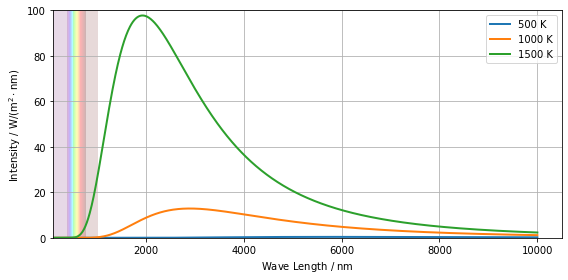

<Figure size 432x288 with 0 Axes>

In [6]:
# Wave length band in µm.
wave_length_band = np.linspace(0.1,10,1000)
wavelengths = np.linspace(100, 1000, 1000)

temperatures = [500, 1000, 1500]
                #300, 400, 
                #500, 600, #1000]
                #500, 700, 800, 900, 1000, 
                #1100, 1200, 1300, 1400]




# Define the wave length for the visual spectrum in nm.
clim=(350,780)
# clim=(0.350,0.780)

# Scale the colors to the to the correct x-values (wave length).
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
# wl = np.arange(clim[0],clim[1]+0.001,0.002)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)


# Set up plot.
fig, axs = plt.subplots(1, 1, figsize=(8,4), 
                        tight_layout=True)

# Create map to fill the background with the colour spectrum.
# y = np.linspace(0, 6, 100)
y = np.linspace(0, 100, 100)
X,Y = np.meshgrid(wavelengths, y)

extent=(np.min(wavelengths), 
        np.max(wavelengths), 
        np.min(y), np.max(y))

# Plot the colour spectrum.
plt.imshow(X, clim=clim,  extent=extent, 
           cmap=spectralmap, aspect='auto',
          alpha=0.3)


# Plot the emission curves based on radiator temperature.
for radiator_temp in temperatures[:]:
    em_powers = list()
    for wavelength in wave_length_band:
        em_power = mono_em_power(temperature=radiator_temp, 
                                 wavelength=wavelength)
        em_powers.append(em_power/1000)

    plt.plot(wave_length_band*1000, em_powers, 
             label="{} K".format(radiator_temp), lw=2)


plt.xlabel('Wave Length / $\sf nm$')
plt.ylabel('Intensity / $\sf W/(m^2\cdot nm)$')
plt.xlim()

plt.grid()
plt.legend()

plt.savefig('./figs/radiative-spectrum-full.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-radi-full-spectrum

<img src="./figs/radiative-spectrum-full.svg" width="100%">

Radiative emission spectrum.
:::

With higher surface temperature
* the maximal intensity wavelength moves to lower values, and
* the total intensity increases.


:::{figure-md} fig-heat-em-colors

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/Example_incandescence_colors_%28temperature_range_550_-_1300_C%29.svg" width="30%">

Approximation of the color of an incandescent object. Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Example_incandescence_colors_(temperature_range_550_-_1300_C).svg).
:::

:::{figure-md} fig-heat-em-hot-metal

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Hot_metalwork.jpg" width="60%">

Hot metal. Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Hot_metalwork.jpg).
:::

### Emitted Power

The total energy ($\mf E_b$) emitted by a black body radiator is described by the Stefan-Boltzmann law

$$
\mf E_b = \sigma T^4 \quad ,
$$

with the Stefan-Boltzmann constant $\mf \sigma = 5.67\cdot 10^{-8}W~m^{-2}K^{-4}$. However, in practical applications most radiation comes from non-ideal black body radiators, and therefore the concept of gray bodies is introduced. The ratio of energy emitted to the emission of a fictitious $\mf \epsilon$ is defined as

$$
\mf \epsilon = \frac{E}{E_b}
$$

and is called emissivity. In this assumption it is independent of the emitted wavelength. Absorptivity is equal to emissivity.


There exist three ways how an incident electromagnetic wave can interact at the surface of a gas and a solid body, see {numref}`fig-heat-radiation-surface`:

* **absorption**: the wave’s energy is transferred to heat
* **transmission**: the wave passes the body
* **reflection**: the wave is reflected either specular or diffusive

In fires, mostly the reflection is a diffusive one, which means, that the reflected radiation is distributed on all outgoing angles. 

:::{figure-md} fig-heat-radiation-surface

<img src="./figs/radiation-interaction.svg" width="60%">

Interaction of incident radiation with a solid body.
:::

The energy flux $\mf Q_{1\rightarrow 2}$ from a diffusive radiator surface $\mf A_1$ to an other surface $\mf A_2$ is given by 

$$
\mf Q_{1\rightarrow 2} = \sigma \epsilon A_1 T_1^4 F_{1\rightarrow 2} \quad ,
$$

with the view factor $\mf F_{1\rightarrow 2}$. This factor is the fraction of the totally emitted energy that may be absorped by the target, here the surface $\mf A_2$. {numref}`fig-heat-radiation-general-viewfactor` illustrates the geometrical setup of the following view factor integration:

$$
\mf F_{1\rightarrow 2} = \frac{1}{A_1}\int_{A_1}\int_{A_2}\frac{cos(\beta_1)cos(\beta_2)}{\pi \left|\vec{R}\right|^2}\ dA_2dA_1 \quad .
$$

:::{figure-md} fig-heat-radiation-general-viewfactor

<img src="./figs/radiation-general-viewfactor.svg" width="80%">

General view factor between infinitesimal surface elements.
:::

There exist integrated results for many configurations, like shown in the appendix D (Configuration Factors) in {cite}`sfpe-handbook-5th`. 

### Radiation Transfer

The transport of radiation through a medium must include the following processes:

* absorption,
* scattering,
* emission, and
* scattering addition.

:::{figure-md} fig-heat-radiation-general-transfer

<img src="./figs/yeoh-radiation-transfer.png" width="60%">

Radiation transfer in a medium. Source: {cite}`Yeoh.2009`.
:::

The change of monochromatic intensity $\mf I_\lambda$ in a control volume in the direction $\mf \vec{s}$ is given by

$$
\mf \frac{dI_\lambda}{dt} = \partial_t I_\lambda + c\partial_s I_\lambda \quad .
$$

Due to the fact, that light travels so fast, a common approximation is to neglect the partial derivative w.r.t. time:

$$
\mf dI_\lambda \approx c\ dt\ \partial_s I_\lambda = ds\ \partial_s I_\lambda \quad .
$$

The change of intensity per unit path length is due to net gain of radiant energy and therefore:

$$
\mf \partial_s I_\lambda(\vec{r},\vec{s}) = \underbrace{-(K_{a,\lambda} + \sigma_{s,\lambda}) I_\lambda(\vec{r},\vec{s})}_{\text{absorption and scattering loss}} + \underbrace{K_{a,\lambda}I_{b,\lambda}(\vec{r})}_{\text{gas emission}} + \underbrace{\frac{\sigma_{s,\lambda}}{4\pi}\int_{4\pi}\Phi(\vec{s}', \vec{s})I_\lambda(\vec{s}')\ d\Omega'}_{\text{scattering}} \quad .
$$

This equation involves coefficients for local spectral absorption ($\mf K_{a,\lambda}$) and scattering ($\mf \sigma_{a,\lambda}$). The scattering phase function $\mf \Phi$ allows to integrate over a full sphere to compute scattered waves into the direction $\mf \vec{s}$. As this integral differential equation is very difficult to solve in complex geometries, a common assumption in field modelling is to neglect scattering effects. This reduces the transport equation to an ordinary differential equation:

$$
\mf \partial_s I_\lambda(\vec{r},\vec{s}) = -K_{a,\lambda}  I_\lambda(\vec{r},\vec{s}) + K_{a,\lambda}I_{b,\lambda}(\vec{r}) \quad .
$$

Gases interact differently with radiation w.r.t. to the wavelength:

* molecular gases (e.g. $\mf H_2O$ or $\mf CO_2$) are selective absorbers and emitters, and
* large particles (e.g. soot) have a broad absorption spectrum.

:::{figure-md} fig-heat-radiation-gas-emissivity

<img src="./figs/yeoh-radiation-gas-emissivity.png" width="60%">

Emissivity spectrum of $\mf CO_2$ and $\mf H_2O$. Source: {cite}`Yeoh.2009`.
:::

:::{figure-md} fig-heat-radiation-soot-emissivity

<img src="./figs/yeoh-radiation-spectrum-soot.png" width="60%">

Emissivity spectrum of soot compared to a black body radiator. Source: {cite}`Yeoh.2009`.
:::


